In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# import plotly.graph_objects as go

In [6]:
df_cust = pd.read_csv(r"C:\Users\mahab\Desktop\Machine Learning\Datasets\Mall_Customers.csv")
df_cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df_cust.shape

(200, 5)

In [8]:
from sklearn.cluster import KMeans

Basic Clustering in 2D (we can actually use 2 variable but now lets understand Age and Spending and then we can go on 2D to 3D and n variable)

In [9]:
# Basic Clustering on Age and Spending - 2D

df_cust.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
sel_cols = ["Age","Spending Score (1-100)"]
df_cust[sel_cols]

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


Lets plot the scatter plot to understand the distribution 

<function matplotlib.pyplot.show(close=None, block=None)>

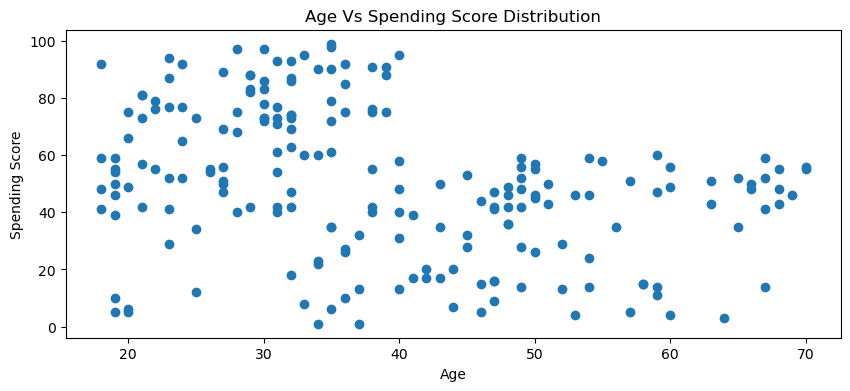

In [18]:
plt.subplots(figsize=(10,4))
plt.scatter(x="Age",y = "Spending Score (1-100)", data = df_cust)
plt.title("Age Vs Spending Score Distribution")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show

Now we decide the K-Value (We need Elbow Chart)

1. To decide the K-Value, we use Elbow chart technique to determine the optimal number of clusters in K-Means Clustering
2. It plots cost function produced by different "K" value
3. As "K" increases, average distortion/Variance will decrese

In [19]:
elbow = df_cust[["Age","Spending Score (1-100)"]].iloc[:,:].values # to get the 2-D array

In [20]:
# Keeping an empty list
inertia = []

In [21]:
for n in range(1,11):
    algo = KMeans(n_clusters = n, init = "k-means++",n_init=11,max_iter=300, tol=.00001, random_state=45,algorithm="elkan")
    algo.fit(elbow)
    inertia.append(algo.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [22]:
inertia

[171535.49999999997,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23811.52352472089,
 19489.64388446867,
 15514.193134351028,
 13055.626865965574,
 11459.506094710445,
 10173.03947811448]

Plotting the Elbow Chart

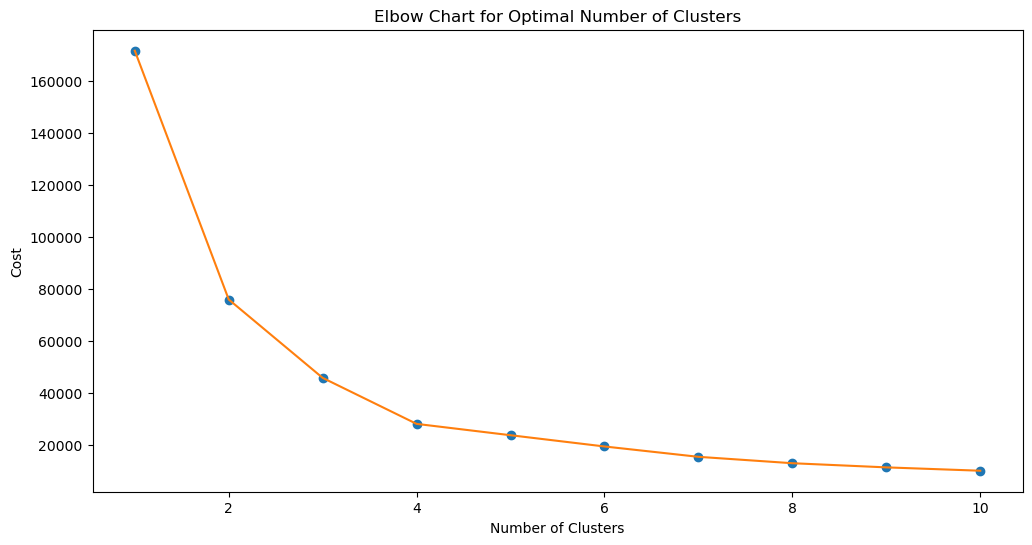

In [27]:
plt.subplots(figsize=(12,6))
plt.plot(np.arange(1,11), inertia,"o") # just to allign with the number of Clusters
plt.plot(np.arange(1,11), inertia, "-")
plt.title("Elbow Chart for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()

Each data point on this Elbow chart is 1 iteration with the cost. Everytime we run it we get a cost.

In [28]:
# Let us start with k=3

algo_3 = (KMeans(n_clusters=3, init="k-means++", n_init=3, max_iter=300,tol=.00001,random_state=45,algorithm="elkan"))
algo_3.fit(elbow)


KMeans(algorithm='elkan', n_clusters=3, n_init=3, random_state=45, tol=1e-05)

In [29]:
labels1 = algo_3.labels_

In [30]:
centroid1 = algo_3.cluster_centers_

In [32]:
labels1

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [33]:
centroid1

array([[29.56451613, 80.74193548],
       [42.95744681, 14.59574468],
       [43.05494505, 47.78021978]])

Plotting the Clusters with Centroids

<function matplotlib.pyplot.show(close=None, block=None)>

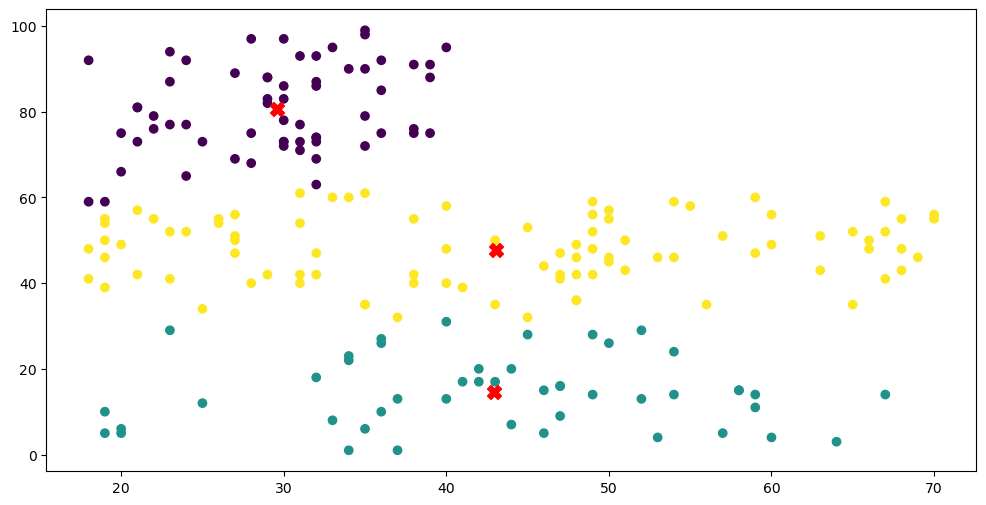

In [34]:
plt.subplots(figsize=(12,6))
plt.scatter(elbow[:,0],elbow[:,1], c=labels1,cmap="viridis")
plt.scatter(centroid1[:,0],centroid1[:,1],marker="X", color = "red", s=100)
plt.show

Comparing the data

<function matplotlib.pyplot.show(close=None, block=None)>

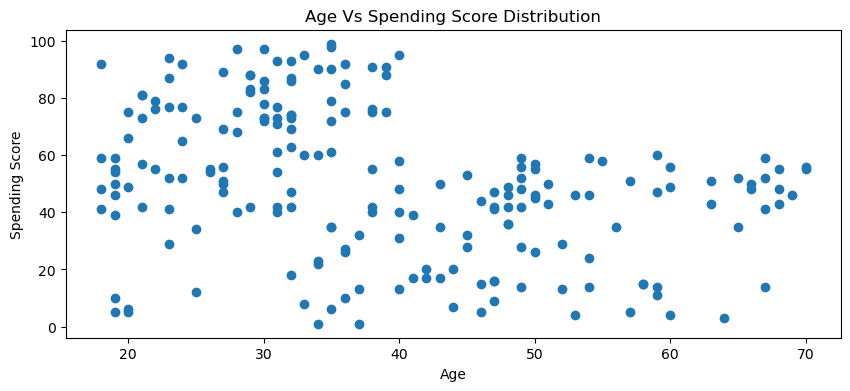

In [35]:
plt.subplots(figsize=(10,4))
plt.scatter(x="Age",y = "Spending Score (1-100)", data = df_cust)
plt.title("Age Vs Spending Score Distribution")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show

In [38]:
# Let us start with k=4

algo_4 = (KMeans(n_clusters=4, init="k-means++", n_init=4, max_iter=300,tol=.00001,random_state=45,algorithm="elkan"))
algo_4.fit(elbow)
labels2 = algo_4.labels_
centroid2 = algo_4.cluster_centers_
labels2
centroid2

array([[30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

<function matplotlib.pyplot.show(close=None, block=None)>

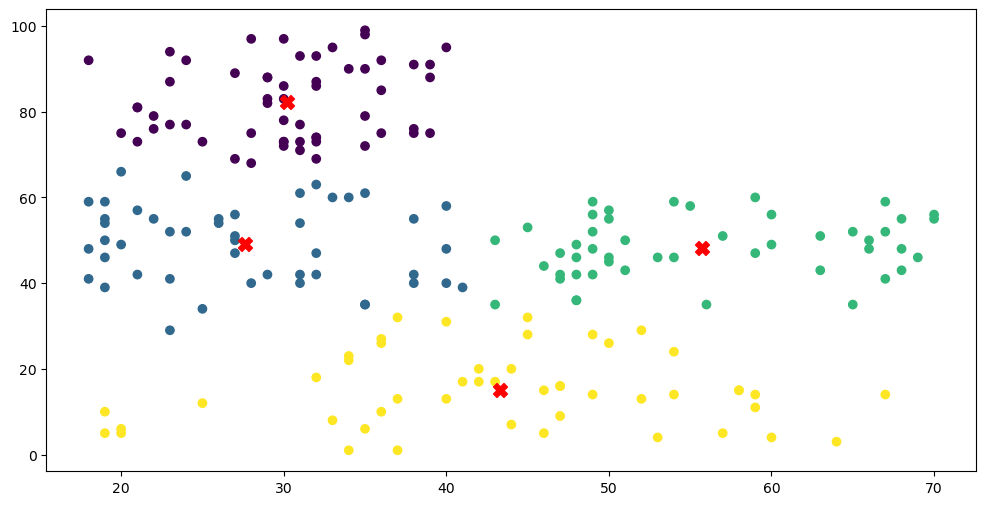

In [37]:
plt.subplots(figsize=(12,6))
plt.scatter(elbow[:,0],elbow[:,1], c=labels2,cmap="viridis")
plt.scatter(centroid2[:,0],centroid2[:,1],marker="X", color = "red", s=100)
plt.show

In [41]:
df_labels_4 = pd.DataFrame(labels2, columns=["Clusters"])
df_labels_4

,Clusters
0,1
1,0
2,3
3,0
4,1
...,...
195,0
196,3
197,0
198,3


In [45]:
cust_with_clusters = pd.concat([df_cust, df_labels_4],axis=1)
cust_with_clusters.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
